<a href="https://colab.research.google.com/github/Flychuban/Tyres-Condition/blob/main/LicencePlateDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

In [2]:
# Test for GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

WARNING ⚠️ 'yolo mode=checks' is deprecated. Use 'yolo checks' instead.
Ultralytics YOLOv8.0.157 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/78.2 GB disk)


In [4]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/drive/MyDrive/NumberPlateRecognition/licence_plate_dataset.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.0.157 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/NumberPlateRecognition/licence_plate_dataset.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchs

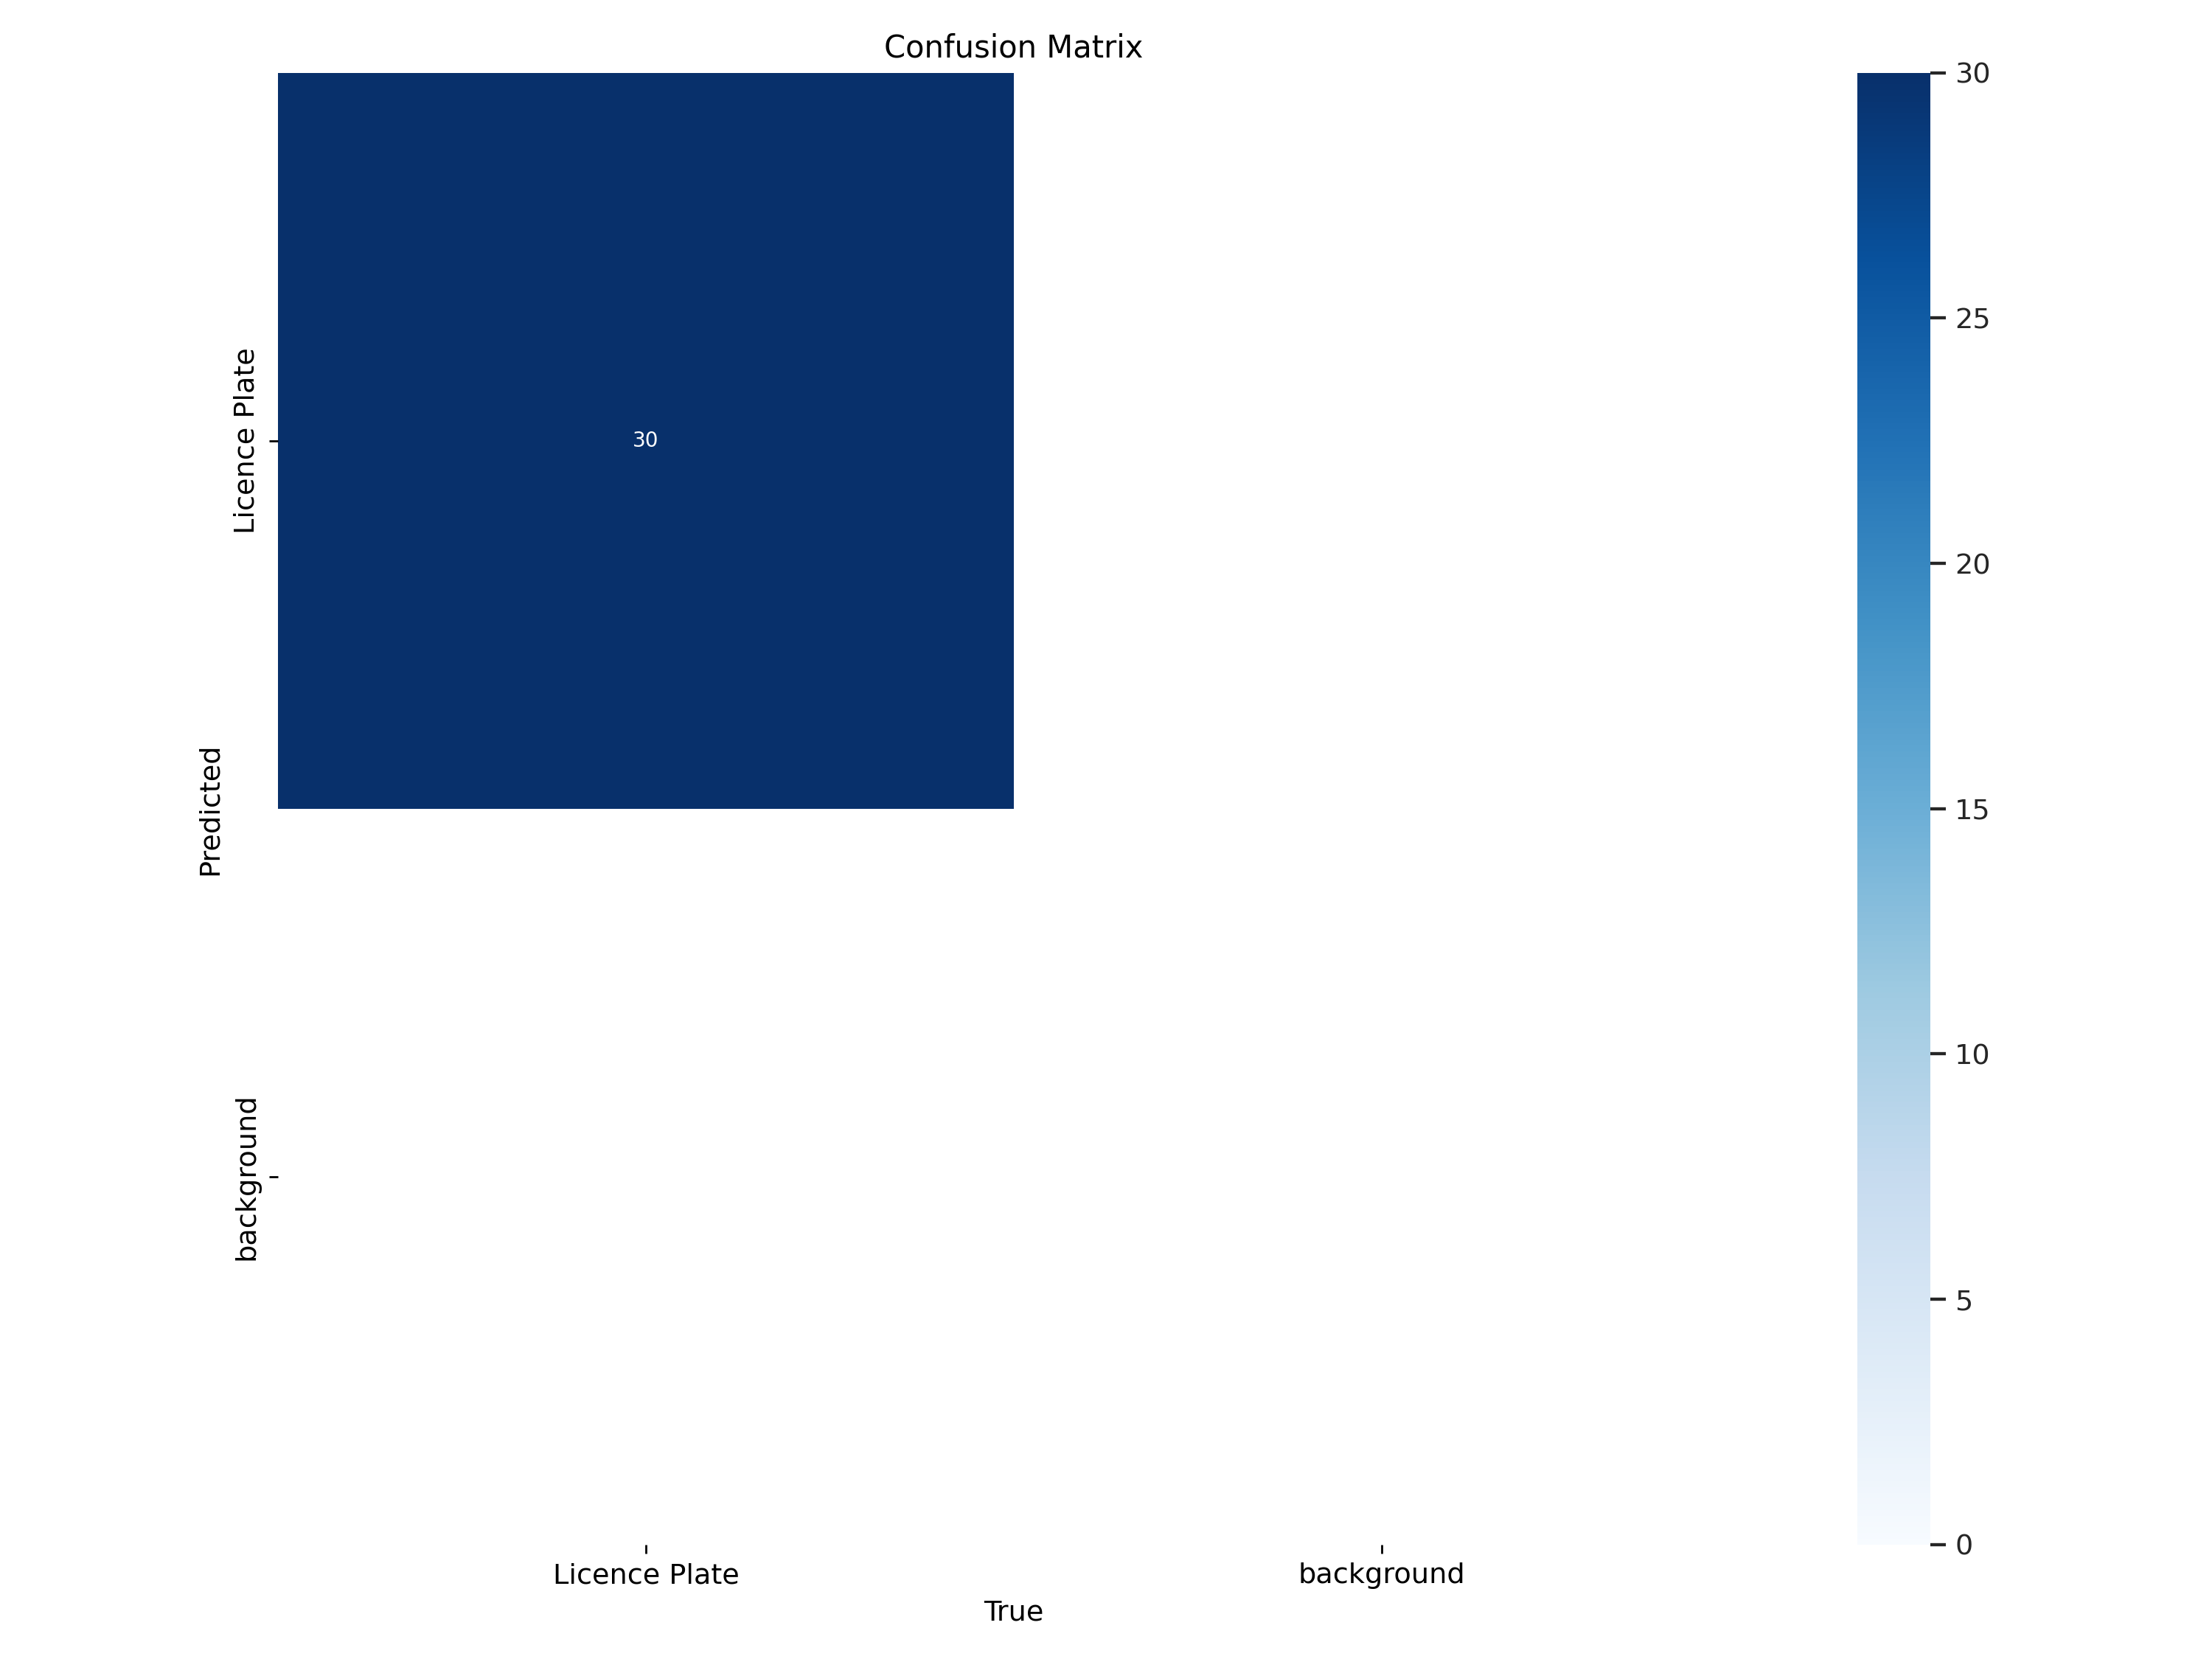

In [5]:
Image(filename=f"/content/runs/detect/train2/confusion_matrix.png", width=600)

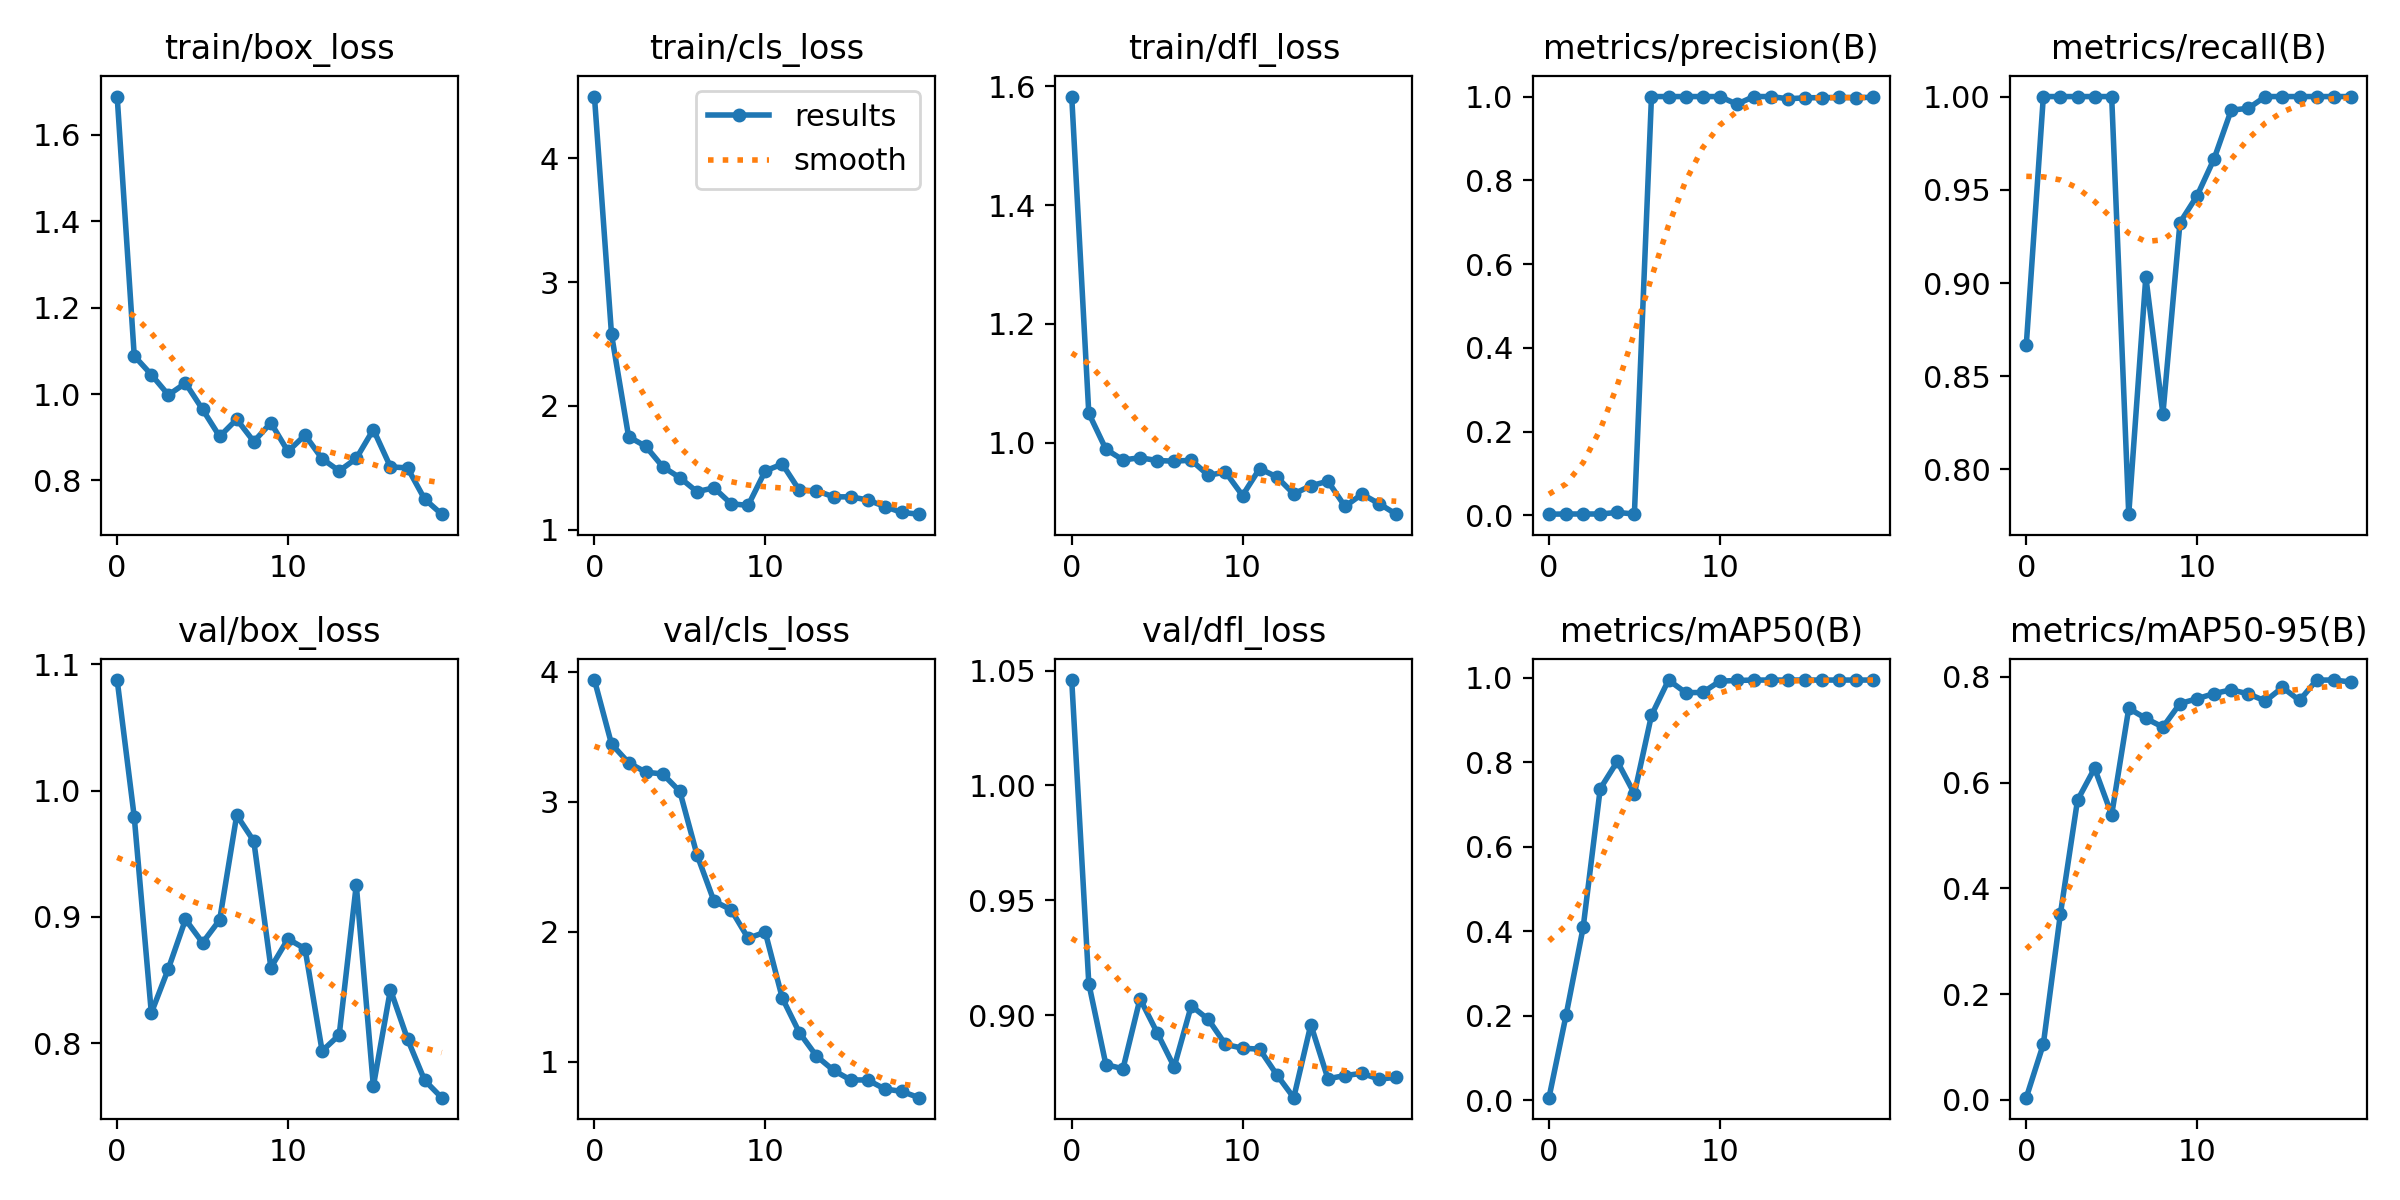

In [6]:
Image(filename=f"/content/runs/detect/train2/results.png", width=600)

In [7]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/drive/MyDrive/NumberPlateRecognition/licence_plate_dataset.yaml

Ultralytics YOLOv8.0.157 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/NumberPlateRecognition/data/val/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100% 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:05<00:00,  2.84s/it]
                   all         30         30      0.998          1      0.995      0.794
Speed: 4.0ms preprocess, 13.4ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val


In [10]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source=/content/drive/MyDrive/NumberPlateRecognition/data/test/images save

Ultralytics YOLOv8.0.157 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

image 1/29 /content/drive/MyDrive/NumberPlateRecognition/data/test/images/IMG_20230809_154215.jpg: 384x640 2 Licence Plates, 57.4ms
image 2/29 /content/drive/MyDrive/NumberPlateRecognition/data/test/images/IMG_20230809_154224.jpg: 384x640 1 Licence Plate, 5.9ms
image 3/29 /content/drive/MyDrive/NumberPlateRecognition/data/test/images/IMG_20230809_154237.jpg: 384x640 1 Licence Plate, 6.1ms
image 4/29 /content/drive/MyDrive/NumberPlateRecognition/data/test/images/IMG_20230809_154247.jpg: 384x640 1 Licence Plate, 5.8ms
image 5/29 /content/drive/MyDrive/NumberPlateRecognition/data/test/images/IMG_20230809_154252.jpg: 384x640 1 Licence Plate, 7.8ms
image 6/29 /content/drive/MyDrive/NumberPlateRecognition/data/test/images/IMG_20230809_154303.jpg: 384x640 1 Licence Plate, 6.1ms
image 7/29 /content/drive/MyDrive/NumberPlateRecognition/data/

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f"/content/runs/detect/predict/*jpg")[:20]:
  display(Image(filename=image_path, height=600))
  print("\n")